# Unit 5 - Financial Planning

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [7]:
# Load .env enviroment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = float(btc_data['data']['1']['quotes']['USD']['price'])
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = float(eth_data['data']['1027']['quotes']['USD']['price'])
# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $46491.60
The current value of your 5.3 ETH is $13637.22


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
today = pd.Timestamp('2022-3-08', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
spy_agg_price = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000, 
    start =today,
    end = today).df

# Preview DataFrame
spy_agg_price.head()

AGG                                         \
                             open      high       low     close   volume   
time                                                                       
2022-03-08 00:00:00-05:00  109.25  109.3301  109.1201  109.2465  6065718   

                             SPY                                    
                            open    high     low  close     volume  
time                                                                
2022-03-08 00:00:00-05:00  419.7  427.21  415.12  421.1  108393446

In [19]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg_price.iloc[0]['AGG']['close']
spy_close_price = spy_agg_price.iloc[0]['SPY']['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.2465
Current SPY closing price: $421.1


In [20]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21055.00
The current value of your 200 AGG shares is $21849.30


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings= {
    "crypto": my_btc_value+my_eth_value,
    "shares":my_spy_value+my_agg_value}

# Create savings DataFrame
df_savings= pd.DataFrame.from_dict(data=df_savings, orient='index')
df_savings.columns = ['amount']
# Display savings DataFrame
df_savings.head()

,amount
crypto,60128.818
shares,42904.300


<AxesSubplot:ylabel='amount'>

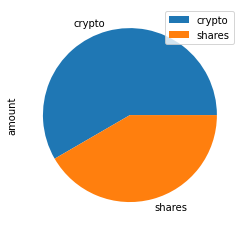

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()


# Validate saving health
if total_savings > emergency_fund:
    print('Congrats, you have enough money!')
elif total_savings == emergency_fund:
    print('Congrats, you have reached your goal!')
else:
    print(f'You are {emergency_fund-total_savings} away from your goal')

Congrats, you have enough money!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-08', tz='America/New_York').isoformat()

In [27]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013.0     NaN   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390.0  270.93   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377.0  270.90   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748.0  267.91   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628.0  264.16   

                                                                
                             high     low   close       volume  
time                                                            
2018-03-19 00:00:00-04:00     NaN     NaN     NaN          NaN  
2018-03-20 00:00:00-04:00  271.67  270.18  270.94   38399686.0  
2018-03-21 00:00:00-04:00  273.27  270.19  270.43   59831437.0  
2018-03-22 00:00:00-04:00  268.87  263.36  263.67  105012105.0  
2018-03-23 00:00:00-04:00  265.02  257.83  258.01  117338697.0

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30)

In [29]:
# Printing the simulation input data
monte_carlo.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2018-03-19 00:00:00-04:00  106.56  106.74  106.53  106.58  2068013.0   
2018-03-20 00:00:00-04:00  106.44  106.51  106.40  106.41  2769390.0   
2018-03-21 00:00:00-04:00  106.32  106.48  106.08  106.41  2841377.0   
2018-03-22 00:00:00-04:00  106.67  106.80  106.49  106.61  2789748.0   
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.61  2569628.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-19 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2018-03-20 00:00:00-04:00    -0.001595  270.93  271.67  270.18  270.94   
2018-03-21 00:00:00-04:00     0.000000  270.90  273.27  270.19  270.43   
2018-03-22 00:00:00-04:00     0.001880  267.91  268.87  263.36  263.67   
2018-03-23 00:00:00-04:00     0.000000  264.16  265.02  257.83  258.01   

                                                     
                                volume daily_return  
time                                                 
2018-03-19 00:00:00-04:00          NaN          NaN  
2018-03-20 00:00:00-04:00   38399686.0          NaN  
2018-03-21 00:00:00-04:00   59831437.0    -0.001882  
2018-03-22 00:00:00-04:00  105012105.0    -0.024997  
2018-03-23 00:00:00-04:00  117338697.0    -0.021466

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_simulation = monte_carlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ajedw\Desktop\Homework\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

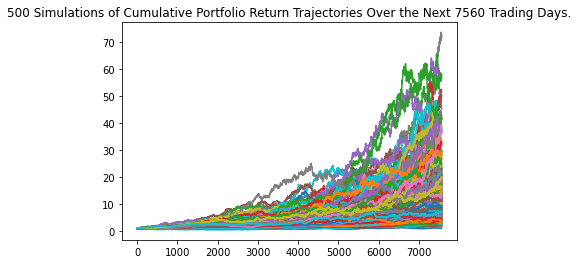

In [33]:
# Plot simulation outcomes
lineplot = monte_carlo.plot_simulation()

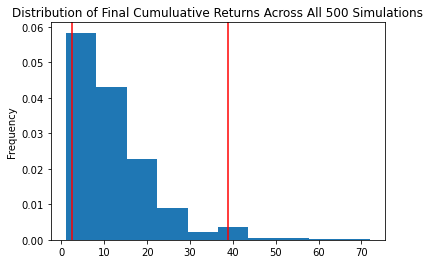

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = monte_carlo.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = monte_carlo.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             12.321048
std               9.547071
min               1.013664
25%               5.840411
50%               9.554586
75%              16.270260
max              72.027068
95% CI Lower      2.496797
95% CI Upper     38.838994
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49935.94 and $776779.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74903.91 and $1165169.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo2= MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ajedw\Desktop\Homework\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994627,1.011770,0.999407,0.995799,1.009304,1.001890,1.002893,1.009186,1.001014,1.004986,...,0.999687,0.994958,0.998683,0.999719,0.990590,1.004213,1.010954,1.001908,1.004684,0.997882
2,0.990876,1.005968,1.013570,0.987484,1.013654,1.012161,1.006887,1.010954,0.995516,1.007972,...,0.993779,0.992658,0.993509,1.003836,0.989397,1.015966,1.024300,0.999391,1.010683,0.983557
3,0.971656,1.009703,1.008544,0.989331,1.026736,1.015591,0.991231,1.026196,1.000818,1.027346,...,0.994665,0.986319,0.992322,1.004464,0.997587,1.023401,1.026000,1.010317,1.015197,0.981853
4,0.969882,1.011733,1.008284,0.980334,1.029212,1.019921,0.987079,1.027822,1.016838,1.020946,...,0.987607,0.982155,0.986633,0.987472,0.989983,1.031795,1.020594,1.004524,1.006940,0.987004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.446827,0.921293,1.412330,2.261827,1.859517,1.149542,1.097747,1.010616,1.775684,0.915721,...,0.985439,1.877846,1.430616,0.984935,1.970796,1.509101,0.842370,1.615775,1.155511,2.548523
1257,1.430809,0.930140,1.420880,2.249514,1.853254,1.156799,1.100690,1.003181,1.768904,0.909983,...,0.983197,1.886338,1.425870,1.002121,1.963308,1.499632,0.839961,1.617049,1.149555,2.542442
1258,1.427490,0.934831,1.421489,2.246251,1.825178,1.154188,1.105735,1.011772,1.780620,0.914765,...,0.986516,1.882048,1.433231,1.008704,2.002522,1.499435,0.844922,1.611930,1.148942,2.522759
1259,1.423200,0.915749,1.422752,2.232928,1.818654,1.157843,1.122032,1.016995,1.784471,0.914889,...,0.990898,1.875536,1.442900,0.997226,2.018582,1.510436,0.841442,1.613321,1.147704,2.496155


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

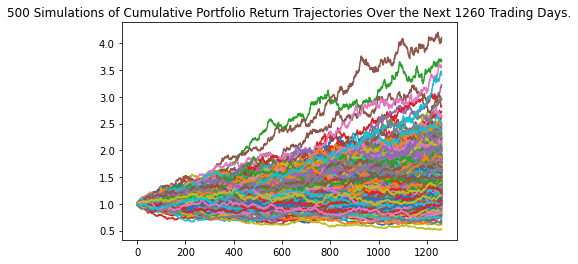

In [40]:
# Plot simulation outcomes
monte_carlo2.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

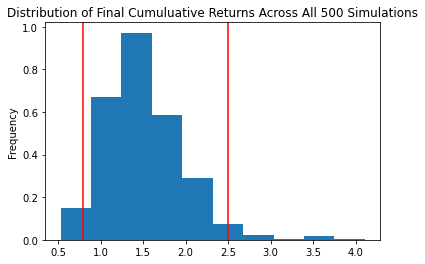

In [41]:
# Plot probability distribution and confidence intervals
monte_carlo2.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = monte_carlo2.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              1.512336
std               0.468342
min               0.527018
25%               1.193042
50%               1.448860
75%               1.766644
max               4.107946
95% CI Lower      0.795392
95% CI Upper      2.495601
Name: 1260, dtype: float64


In [43]:
# Set initial investment
initial_investment2 = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment2,2)
ci_upper_five = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $124839.85 and $1941949.68


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo3= MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ajedw\Desktop\Homework\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006322,1.009662,1.004087,0.994973,0.987802,1.005177,1.000496,0.996500,1.008999,0.999925,...,0.988314,0.995654,1.007608,1.013455,0.998008,0.992252,0.999454,0.999660,0.993882,1.009954
2,1.012233,1.004818,0.997706,0.991776,0.990564,1.001599,0.996411,1.008175,1.019011,0.989153,...,0.999784,1.004966,1.008358,1.016956,1.007425,1.000480,1.004615,1.003067,1.002362,1.005549
3,1.006400,1.010031,1.008493,0.989760,1.007445,0.998448,1.005070,1.014862,1.024965,0.980223,...,0.989831,1.003481,1.008589,1.020691,1.016803,0.999435,1.011100,1.004620,1.003682,1.016643
4,1.007616,1.013991,1.016324,0.997443,1.019150,0.978515,0.999756,1.015768,1.029233,0.985703,...,0.998955,1.006408,1.008223,1.011583,1.016105,0.994799,1.023020,0.996430,1.007345,1.011581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.137113,3.602816,1.935201,3.627038,3.520015,2.432684,3.119008,0.829472,2.746768,2.664380,...,1.438961,2.609629,2.976840,2.136576,1.550674,1.347440,1.532531,2.644520,2.878341,1.846232
2517,2.116213,3.563211,1.922162,3.697709,3.517673,2.430851,3.185073,0.829406,2.746088,2.673448,...,1.436490,2.597508,2.987737,2.115217,1.553641,1.338312,1.534375,2.670768,2.860090,1.857661
2518,2.096354,3.595622,1.946258,3.746896,3.502430,2.427719,3.249688,0.830711,2.737729,2.635273,...,1.443846,2.565158,3.007137,2.131894,1.568423,1.356557,1.531063,2.699766,2.850006,1.853824
2519,2.107560,3.604219,1.958486,3.784326,3.523149,2.438569,3.226200,0.812840,2.769493,2.667817,...,1.434418,2.541558,2.980147,2.122436,1.559835,1.367716,1.528644,2.685162,2.857112,1.878067


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

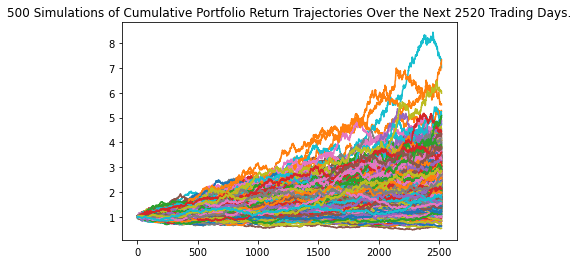

In [47]:
# Plot simulation outcomes
monte_carlo3.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

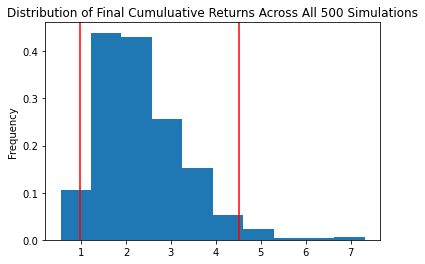

In [48]:
# Plot probability distribution and confidence intervals
monte_carlo3.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = monte_carlo3.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              2.338248
std               0.954943
min               0.540623
25%               1.645054
50%               2.190245
75%               2.819743
max               7.320340
95% CI Lower      0.968820
95% CI Upper      4.523741
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment3= 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment3,2)
ci_upper_ten = round(tbl[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $74903.91 and $1165169.81
